In [2]:
import pandas as pd
import numpy as np

In [3]:
amazon = pd.read_csv(r'C:\Users\diplo\Downloads\amz_uk_price_prediction_dataset.csv')

In [30]:
amazon.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [31]:
amazon.tail(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443642,2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2443643,2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [6]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [7]:
category_count = amazon['category'].value_counts()
print(category_count)
print("Frequency table of categories:")

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64
Frequency table of categories:


In [8]:
top_5_categories = category_count.nlargest(5)
print("\nThe Top 5 Categories are:")
print(top_5_categories)


The Top 5 Categories are:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


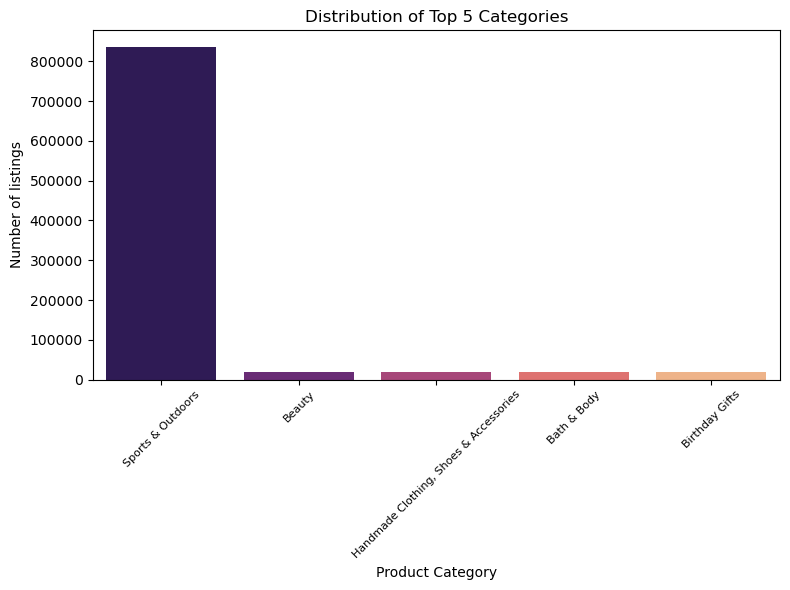

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette='magma', hue=top_5_categories.index)
plt.xlabel('Product Category')
plt.ylabel('Number of listings')
plt.title('Distribution of Top 5 Categories')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()


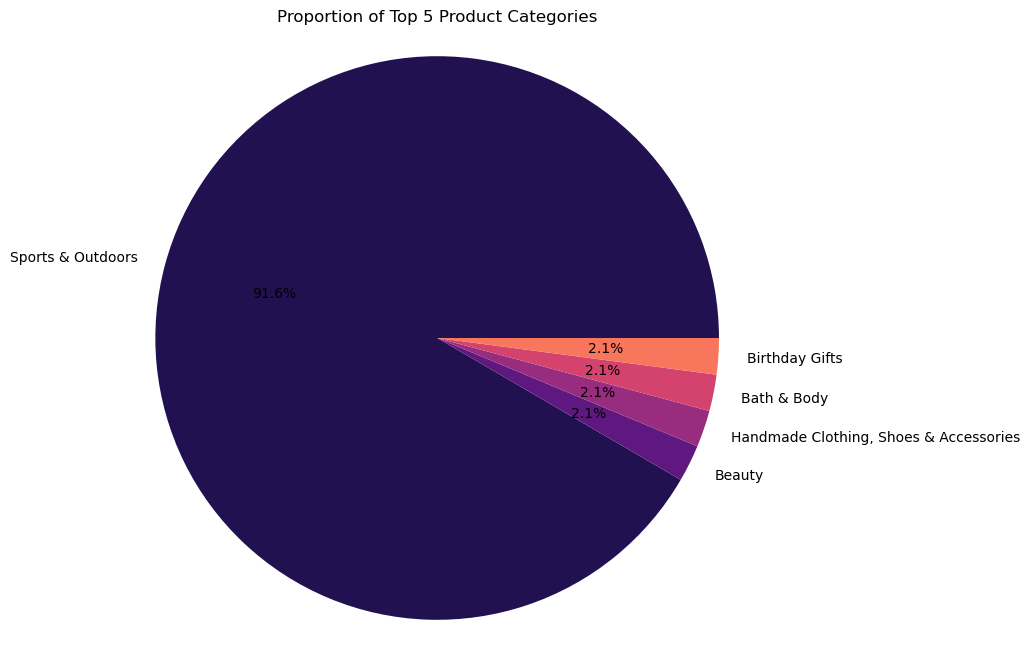

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(top_5_categories.values, labels=top_5_categories.index, autopct='%1.1f%%', colors=sns.color_palette('magma'))
plt.title('Proportion of Top 5 Product Categories')
plt.axis('equal')
plt.show()

In [16]:
mean_price = amazon['price'].mean()
median_price = amazon['price'].median()
mode_price = amazon['price'].mode()[0]
print(f"Mean Price: {mean_price:.2f}")
print(f"Median Price: {median_price:.2f}")
print(f"Mode Price: {mode_price:.2f}")
print(f"\nThe avaerage price point of the product listed is £{mean_price:.2f}.")

Mean Price: 89.24
Median Price: 19.09
Mode Price: 9.99

The avaerage price point of the product listed is £89.24.


In [17]:
price_variance = amazon['price'].var()
price_std = amazon['price'].std()
price_range = amazon['price'].max() - amazon['price'].min()
price_iqr = amazon['price'].quantile(0.75) - amazon['price'].quantile(0.25)
print(f"Price Variance: {price_variance:.2f}")
print(f"Price Standard Deviation: {price_std:.2f}")
print(f"Price Range: {price_range:.2f}")
print(f"Price Interquartile Range: {price_iqr:.2f}")

Price Variance: 119445.49
Price Standard Deviation: 345.61
Price Range: 100000.00
Price Interquartile Range: 36.00


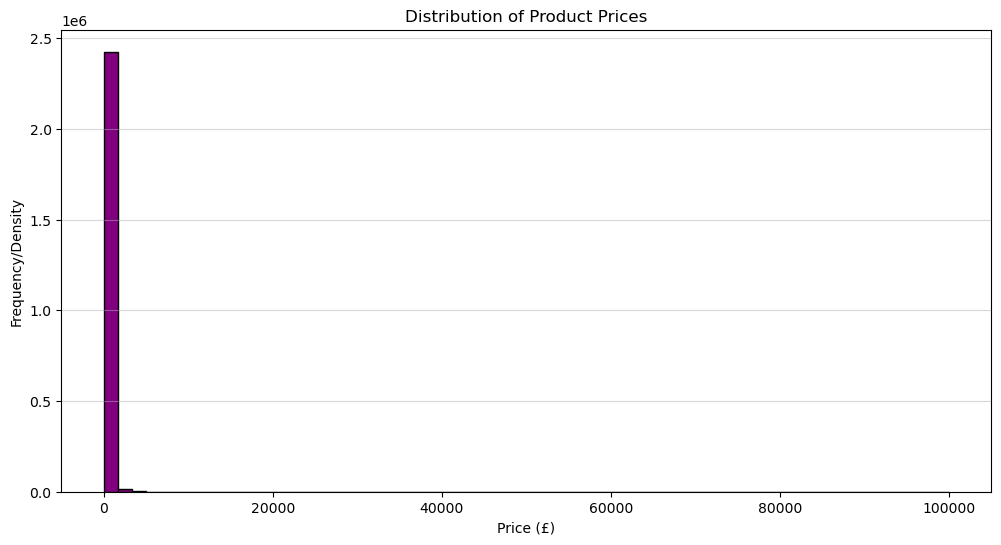

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.hist(amazon['price'], bins=60, color='purple', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency/Density')
plt.grid(axis= 'y', alpha=0.5)
plt.show()


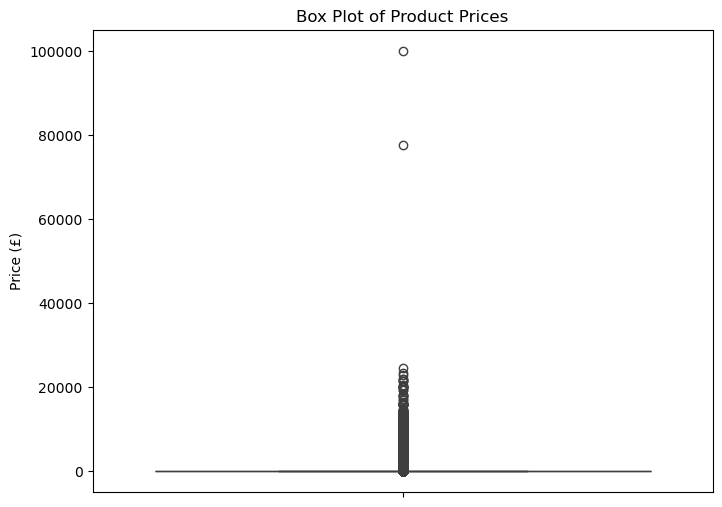

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=amazon['price'])
plt.title('Box Plot of Product Prices')
plt.ylabel('Price (£)')
plt.show()

In [32]:
rating_mean = amazon['stars'].mean()
rating_median = amazon['stars'].median()
rating_mode = amazon['stars'].mode()[0]
print(f"Mean Rating: {rating_mean:.2f}")
print(f"Median Rating: {rating_median:.2f}")
print(f"Mode Rating: {rating_mode:.2f}")
print(f"\nThe average rating of the product listed is {rating_mean:.2f}.")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating: 0.00

The average rating of the product listed is 2.15.


In [33]:
rating_variance = amazon['stars'].var()
rating_std = amazon['stars'].std()
rating_range = amazon['stars'].max() - amazon['stars'].min()
rating_iqr = amazon['stars'].quantile(0.75) - amazon['stars'].quantile(0.25)
print(f"Rating Variance: {rating_variance:.2f}")
print(f"Rating Standard Deviation: {rating_std:.2f}")
print(f"Rating Range: {rating_range:.2f}")
print(f"Rating Interquartile Range: {rating_iqr:.2f}")

print("\nThe consistencies of the ratings can be inferred from:")
print(f"- A standard deviation of {rating_std:.2f}, indicating the typical spread of ratings around the mean. A lower value suggests more consistency.")
print(f"- An interquartile range of {rating_iqr:.2f}, showing the spread of the middle 50% of the ratings. A smaller IQR also suggests more concentrated ratings.")

Rating Variance: 4.82
Rating Standard Deviation: 2.19
Rating Range: 5.00
Rating Interquartile Range: 4.40

The consistencies of the ratings can be inferred from:
- A standard deviation of 2.19, indicating the typical spread of ratings around the mean. A lower value suggests more consistency.
- An interquartile range of 4.40, showing the spread of the middle 50% of the ratings. A smaller IQR also suggests more concentrated ratings.


In [35]:
rating_skewness = amazon['stars'].skew()
rating_kurtosis = amazon['stars'].kurtosis()
print(f"Rating Skewness: {rating_skewness:.2f}")
print(f"Rating Kurtosis: {rating_kurtosis:.2f}")
print(f"The skewness of the ratings is {rating_skewness:.2f}, indicating a slight asymmetry in the distribution. A value close to 0 suggests a symmetric distribution, while positive or negative values indicate right or left skewness, respectively.")
print(f"The kurtosis of the ratings is {rating_kurtosis:.2f}, indicating the 'tailedness' of the distribution. A value close to 0 suggests a normal distribution, while positive values indicate heavier tails and negative values indicate lighter tails.")

Rating Skewness: 0.08
Rating Kurtosis: -1.93
The skewness of the ratings is 0.08, indicating a slight asymmetry in the distribution. A value close to 0 suggests a symmetric distribution, while positive or negative values indicate right or left skewness, respectively.
The kurtosis of the ratings is -1.93, indicating the 'tailedness' of the distribution. A value close to 0 suggests a normal distribution, while positive values indicate heavier tails and negative values indicate lighter tails.


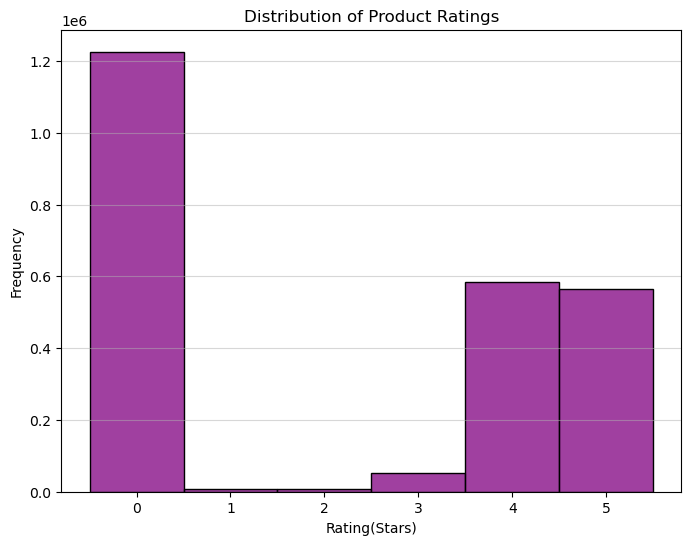

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(amazon['stars'], bins=5, color='purple', edgecolor='black', discrete=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating(Stars)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()